In [2]:
import os
import pydicom
import numpy as np

def load_dicom_images(dicom_folder):
    dicom_files = [f for f in os.listdir(dicom_folder) if f.endswith('.dcm')]
    images = []
    for file in dicom_files:
        dicom_path = os.path.join(dicom_folder, file)
        dicom_data = pydicom.dcmread(dicom_path)
        images.append(dicom_data.pixel_array)
    return np.array(images)

dicom_folder = "/home/shihab/Desktop/Machine Learning/Dataset/3dImageDataset/minData/147-Tahera Sultana. Dr_Nurul_Amin"
images = load_dicom_images(dicom_folder)


In [3]:
images = images / np.max(images)  # Normalize pixel values


In [4]:
from skimage.transform import resize

resized_images = np.array([resize(img, (128, 128)) for img in images])


In [5]:
from skimage.filters import threshold_otsu

def threshold_segmentation(image):
    thresh = threshold_otsu(image)
    binary_mask = image > thresh  # Regions above the threshold
    return binary_mask

binary_masks = [threshold_segmentation(img) for img in resized_images]


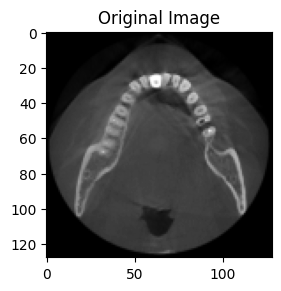

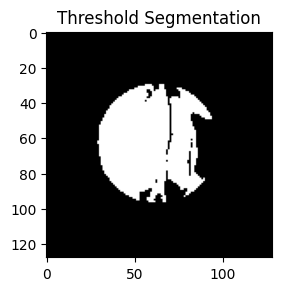

In [14]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(resized_images[0], cmap='gray')
plt.show()

plt.subplot(1, 2, 2)
plt.title("Threshold Segmentation")
plt.imshow(binary_masks[1], cmap='gray')
plt.show()

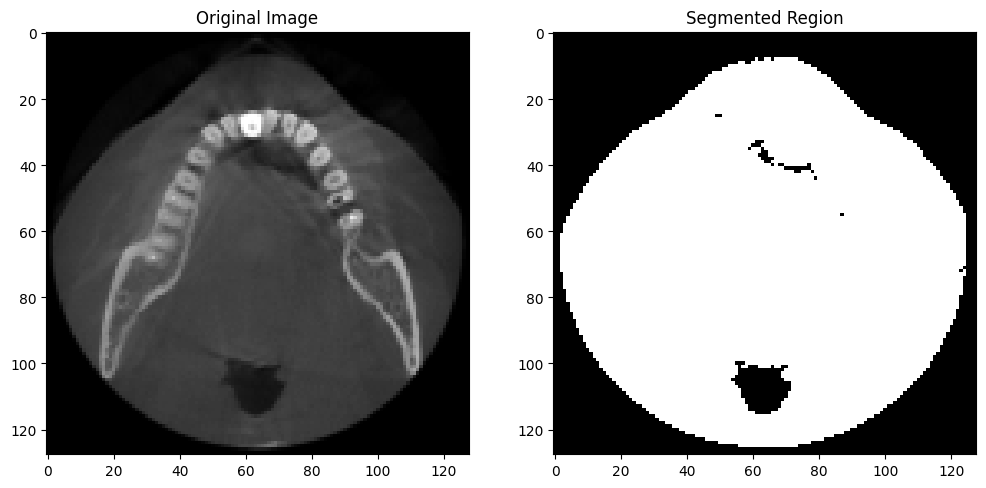

In [15]:
import matplotlib.pyplot as plt

index = 0  # Choose an image index to visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(resized_images[index], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Segmented Region")
plt.imshow(binary_masks[index], cmap='gray')

plt.show()
